# Loading

In [ ]:
import pandas as pd


df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Preprocessing 

In [ ]:

print("The shape of the datset is:  ", df.shape)

# check for null values
print(df.isnull().sum())

# check for duplicate rows
print(df.duplicated().sum())


# clean the dataset
df = df.dropna()  # remove rows with missing values
df = df.drop_duplicates()  # remove duplicate rows
df = df.reset_index(drop=True)  # reset the index after dropping rows


# Display the cleaned DataFrame
print(df.head())

(2392, 15)
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
0
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0   

# DBSCAN

DBSCAN_Cluster
2    630
3    593
0    587
1    582
Name: count, dtype: int64


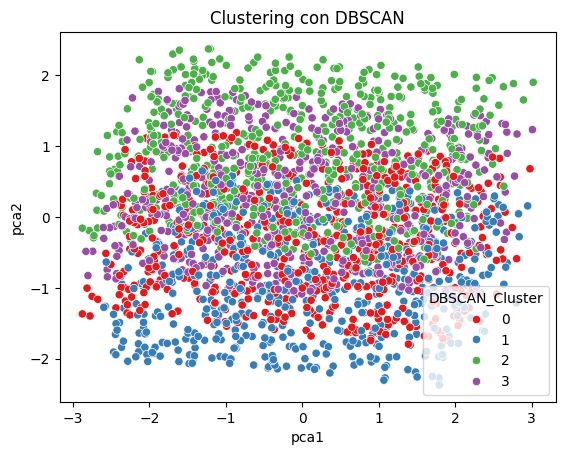

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X_cluster =  df[numeric_cols]
dbscan = DBSCAN(eps=0.8, min_samples=5)

df['DBSCAN_Cluster'] = dbscan.fit_predict(X_cluster)
print(df['DBSCAN_Cluster'].value_counts())

# visualizzazione dei cluster  //  riduzione della dimensionalita da 4 a 2 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='DBSCAN_Cluster', palette='Set1')
plt.title("Clustering con DBSCAN")
plt.show()




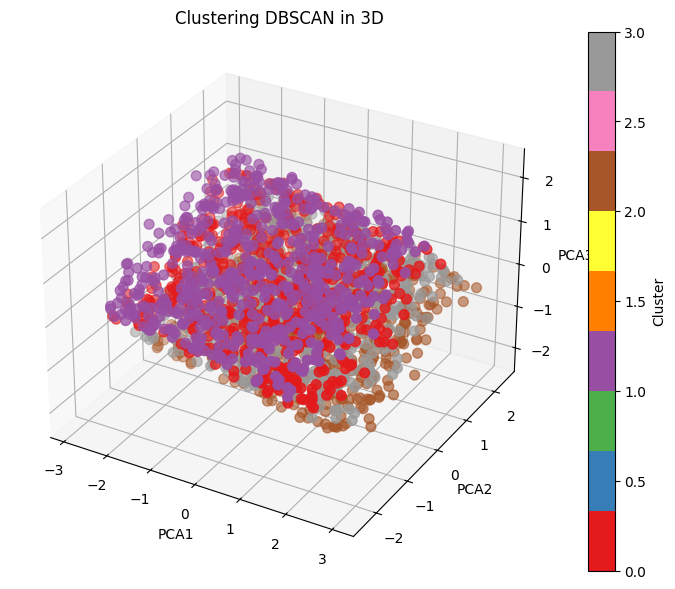

In [20]:
from mpl_toolkits.mplot3d import Axes3D


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_cluster)

df['pca1'] = X_pca3[:,0]
df['pca2'] = X_pca3[:,1]
df['pca3'] = X_pca3[:,2]

# Grafico 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['pca1'], df['pca2'], df['pca3'],
    c=df['DBSCAN_Cluster'], cmap='Set1', s=50
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("Clustering DBSCAN in 3D")

plt.colorbar(sc, label="Cluster")
plt.show()